In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

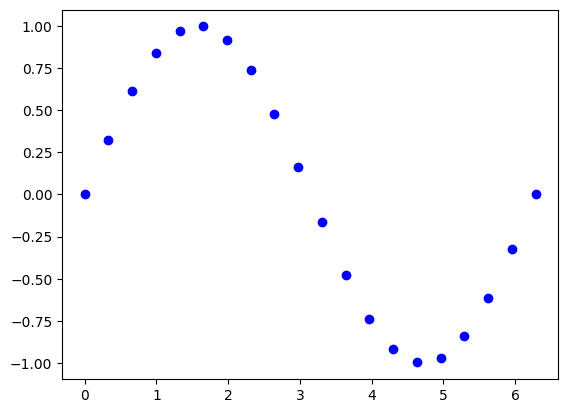

In [2]:
x_train = np.linspace(0,np.pi*2,20)
yd_train = np.array(np.sin(x_train))
plt.plot(x_train, yd_train, 'bo')
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57 (228.00 B)

 Trainable params: 57 (228.00 B)

 Non-trainable params: 0 (0.00 B)

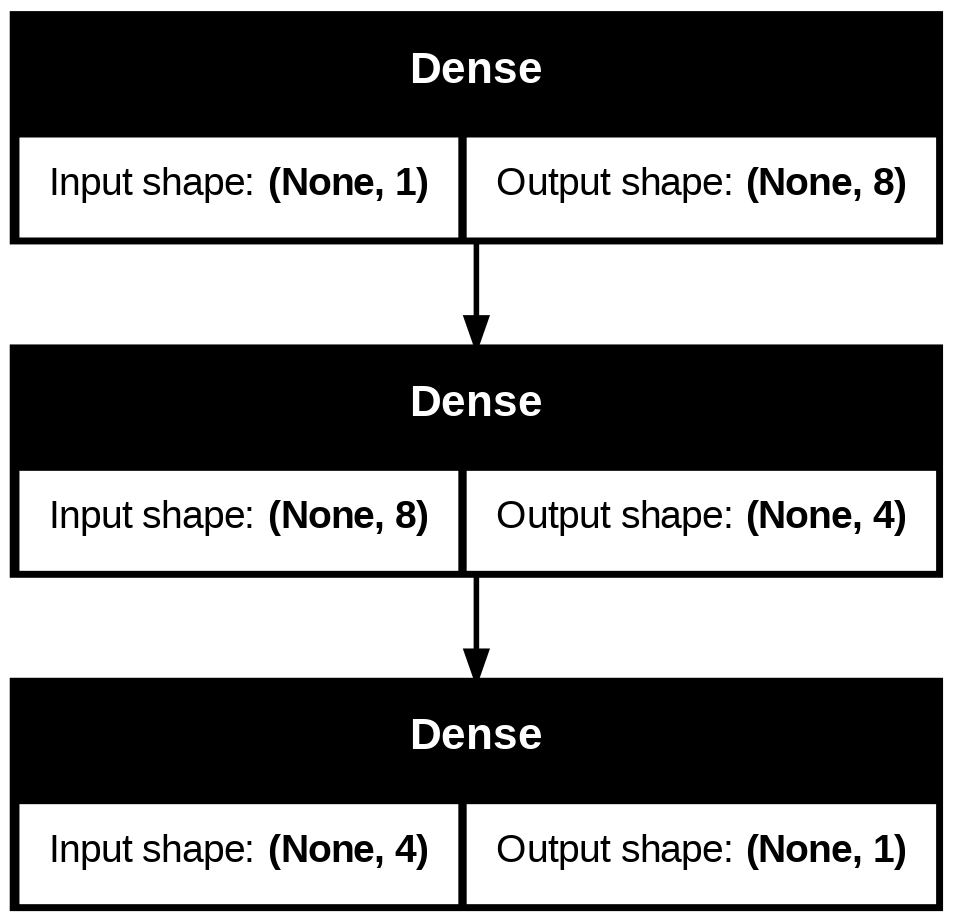

In [3]:
modelo = keras.models.Sequential()
modelo.add(keras.layers.Dense(8,input_shape=(1,),activation='tanh'))
modelo.add(keras.layers.Dense(4,activation='tanh'))
modelo.add(keras.layers.Dense(1,activation='linear'))

modelo.summary()

keras.utils.plot_model(modelo, "RNA_sin.png", show_shapes=True)

In [4]:
modelo.compile(optimizer=Adam(learning_rate=0.01), loss = 'mse')
historia = modelo.fit(x_train,yd_train,epochs=500,verbose=0)
y_predic=modelo.predict(x_train)
print(y_predic)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
[[ 0.00889099]
 [ 0.2899618 ]
 [ 0.61823976]
 [ 0.8745165 ]
 [ 0.9903294 ]
 [ 0.97755045]
 [ 0.8745722 ]
 [ 0.70764244]
 [ 0.483186  ]
 [ 0.19933718]
 [-0.133762  ]
 [-0.47722733]
 [-0.7682338 ]
 [-0.9513347 ]
 [-1.0048254 ]
 [-0.9392755 ]
 [-0.78261876]
 [-0.5683018 ]
 [-0.32850415]
 [-0.08985478]]


In [5]:
modelo.evaluate(x_train,yd_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - loss: 0.0012


0.001233184477314353

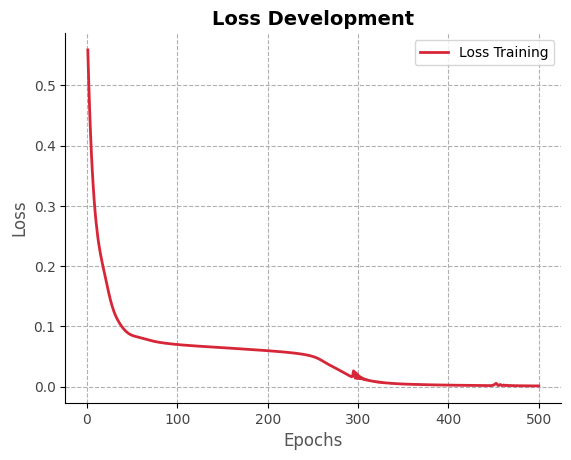

In [8]:
perdida_train = historia.history['loss']
epocas = range(1, len(perdida_train) + 1)
plt.plot(epocas, perdida_train, linestyle='-', color='#D72638', linewidth=2, label='Loss Training')
plt.title('Loss Development', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12, fontweight='medium', color='#555')
plt.ylabel('Loss', fontsize=12, fontweight='medium', color='#555')
plt.xticks(fontsize=10, color='#444')
plt.yticks(fontsize=10, color='#444')
plt.grid(True, linestyle='--', alpha=1)
plt.legend(fontsize=10, loc='upper right', frameon=True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


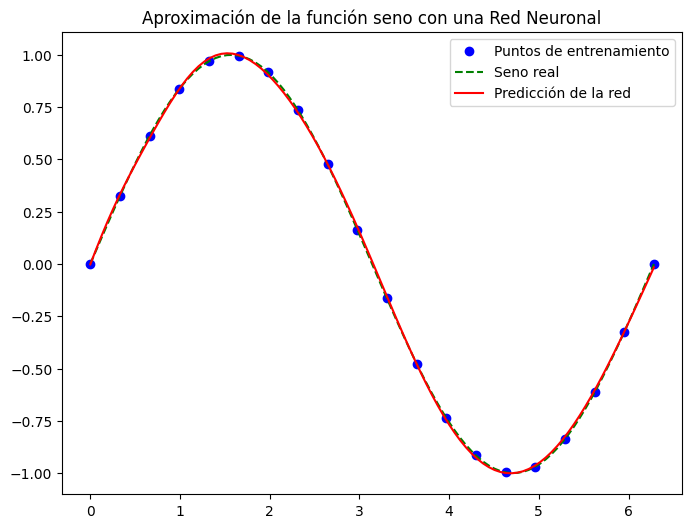

In [ ]:
x_test = np.linspace(0, np.pi*2, 100)
y_pred = modelo.predict(x_test)
plt.figure(figsize=(8,6))
plt.plot(x_train, yd_train, 'bo', label='Puntos de entrenamiento')
plt.plot(x_test, np.sin(x_test), 'g--', label='Seno real')
plt.plot(x_test, y_pred, 'r', label='Predicción de la red')
plt.legend()
plt.title("Aproximación de la función seno con una Red Neuronal")
plt.show()

In [ ]:
hidden1 = modelo.layers[0]
weightsco, biasesco = hidden1.get_weights()
print(weightsco)
print(biasesco)

[[ 0.37361923 -0.88328266  0.99446     1.0464467   0.13513793 -0.14256002
  -0.34186724  0.25766543]]
[-0.4862614   1.4087622  -0.09717859 -0.37857753 -0.20755823  0.37135074
  0.31673142 -1.3399645 ]


In [ ]:
hidden2 = modelo.layers[1]
weightsco, biasesco = hidden2.get_weights()
print(weightsco)
print(biasesco)

[[-1.0550404  -0.04470297  0.5013588   0.62313825]
 [ 1.1005166  -0.57216036  0.18429531 -0.36688888]
 [ 0.1078476  -0.5743169  -0.43704882 -0.08773735]
 [ 0.470094   -0.4434872  -0.4567512  -0.5318953 ]
 [ 2.2891195   1.3246208  -0.21664596 -0.12756819]
 [-1.8260137  -1.0921053   0.07720599 -0.35077846]
 [ 0.49459794 -0.7601373  -0.18068022 -0.23704103]
 [ 1.7949376   1.00678    -0.7059214   0.8140073 ]]
[-0.37302196 -0.07538459 -0.12977679  0.2335794 ]


In [ ]:
CapaSalida = modelo.layers[2]
weightsco, biasesco = CapaSalida.get_weights()
print(weightsco)
print(biasesco)

[[ 1.1621288 ]
 [-1.3996738 ]
 [-1.2300198 ]
 [-0.22474663]]
[0.25002673]


#Conclusiones

Se realizaron 2 entrenamientos de la red:
  - La primera constaba de una red neuronal con 1 entrada, 2 capas ocultas y 1 capa de salida, cada capa oculta tenía 16 neuronas, la cual tenía un total de 256 pesos, sin embargo la diferencia entre el modelo original y el modelo deseado era imperceptible, aún así no era un opción muy viable para poder implementar en el arduino dada la cantidad de datos que debían ser procesados.



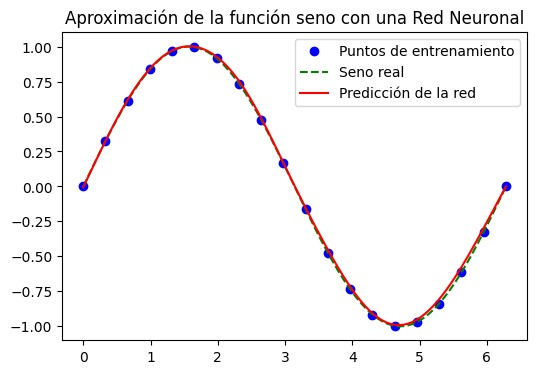

- En la perdida de datos se puede ver que el modelo se entrena satisfactoriamente y la perdida de datos es baja

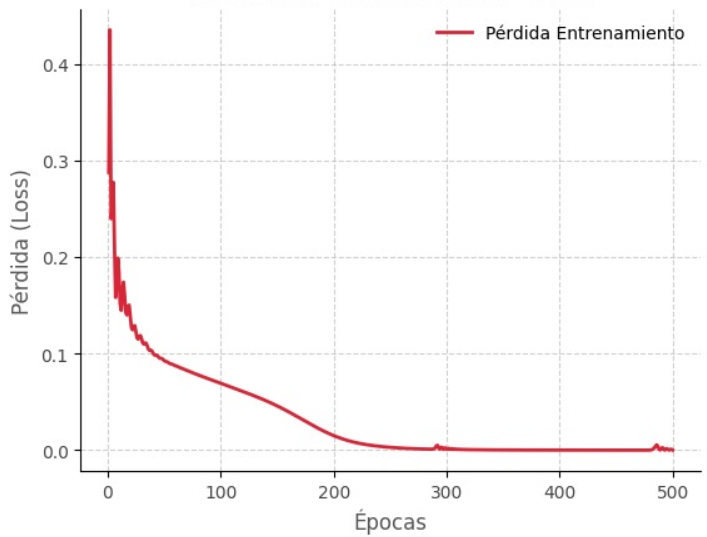

-   La segunda consta de una red neuronal con 1 entrada, 2 capas ocultas y 1 capa de salida, la primera capa densa con 8 neuronas y la segunda capa con 4 neuronas, para la cual daba un total de 32 pesos, a diferencia de la red anterior, esta no se ajusta completamente al modelo de salida deseado, pero aún así se adapta la salida requerida.

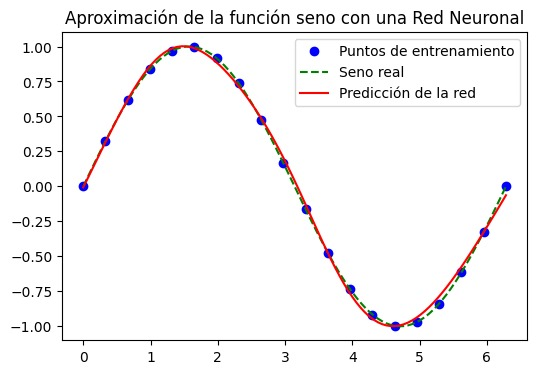

A diferencia del primer entrenamiento la perdida de datos es un poco más elevada en ciertos intervalos.



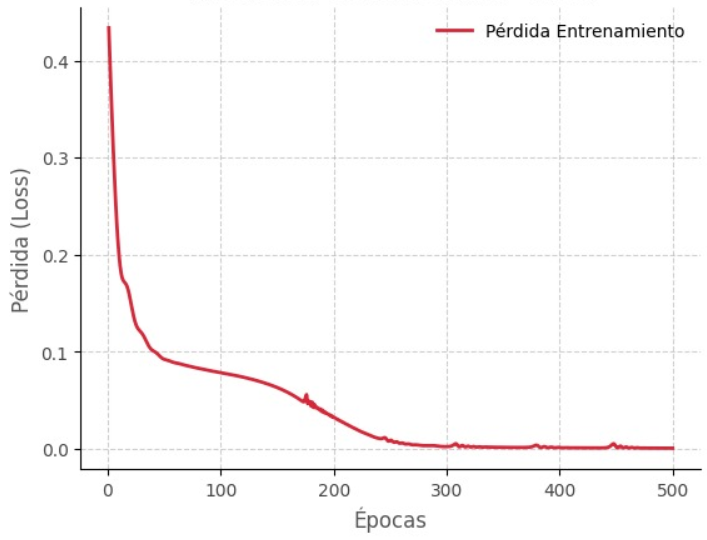